In [1]:
import pandas as pd
data  = pd.read_csv("framingham.csv")
data_verify = data.copy()

In [2]:
# for mathematical calculations
import numpy as np

# to visualize the data and results
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.impute import SimpleImputer


# to build the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV


# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.shape

(4240, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
print(data.select_dtypes(include=['float64','int64']).columns) #Printing the Names on all the Numerical Columns
print(len(data.select_dtypes(include=['float64','int64']).columns)) #Printing the total number of Numerical Columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
16


In [7]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
print(f'Total Missing Values from the whole data set are: ', data.isnull().values.sum())  # Checking the total Null Values of the whole data set 
print(f'Number of Columns with Missing Values are: ', len(data.columns[data.isnull().any()])) #No of Columns with Missing Valeus
print(f'Names of the Columns with Missing Values are: ', data.columns[data.isnull().any()]) #Checking the Name of the columns with null values

Total Missing Values from the whole data set are:  645
Number of Columns with Missing Values are:  7
Names of the Columns with Missing Values are:  Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')


In [9]:
#the columns we want to fill missing values for

selected_cols = ['education', 'cigsPerDay', 'BPMeds','totChol','BMI','heartRate','glucose']


mean_values = data[selected_cols].mean()

# Replace missing and NaN values with mean values for the selected columns
data[selected_cols] = data[selected_cols].fillna(mean_values)

#df.to_csv('new_file.csv', index=False)

In [10]:

print(data.shape)

(4240, 16)


In [11]:

print(data.shape)

(4240, 16)


In [12]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
 # Checking the total Null Values of the whole data set
print(f'Total Missing Values from the whole data set are: ', data.isnull().values.sum())
  
#No of Columns with Missing Valeus
print(f'Number of Columns with Missing Values are: ', len(data.columns[data.isnull().any()])) 

#Checking the Name of the columns with null values
print(f'Names of the Columns with Missing Values are: ', data.columns[data.isnull().any()]) 

Total Missing Values from the whole data set are:  0
Number of Columns with Missing Values are:  0
Names of the Columns with Missing Values are:  Index([], dtype='object')


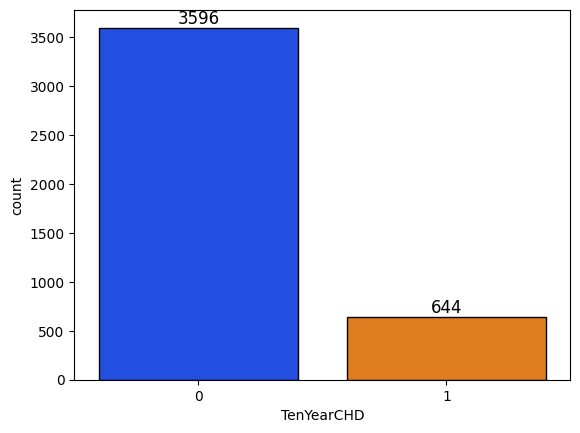

Total Values: 4240


In [14]:
import matplotlib.pyplot as plt

sns.countplot(x='TenYearCHD',data=data,palette='bright',edgecolor='black')
#plt.hist(data["TenYearCHD"]);


for i in range(len(data['TenYearCHD'].value_counts())):
    count = data['TenYearCHD'].value_counts()[i]
    label = count
    plt.annotate(label, (i, count), ha='center', va='bottom', fontsize=12)

plt.show()

print(f'Total Values:',  data.TenYearCHD.count()) 

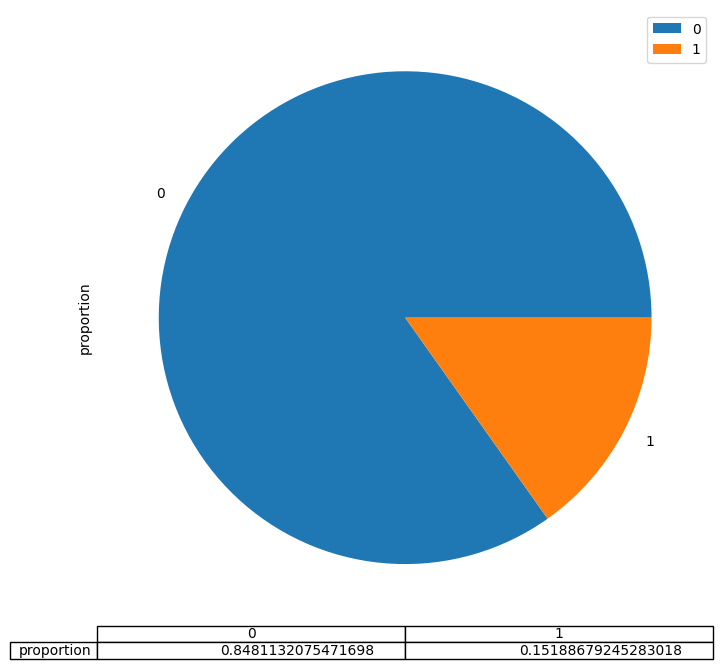

In [15]:
data["TenYearCHD"].value_counts(normalize=True).plot(kind="pie", legend=True, table=True, figsize=(10,8));

In [16]:
X = data.drop(['TenYearCHD'], axis=1)
y = data['TenYearCHD']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(3392, 15)
(848, 15)
(3392,)
(848,)


In [19]:
X_test = pd.DataFrame(X_test)
print(X_test.index.values)

[1350 1434 2500 1128 4144 3883 3624  794  298  184  642 3331 1613 3134
 3378 2793 3317 2067  862  843  270 3159 4110 2922 2358 2442 1088 2913
 2781 4208 3209 2154 3674 4212 2820 2552 2321 1860 4062  506  274  150
 3665 3433  393 1929 3793  693 1161 1992 1052 3496 3698  109  432  759
   96 1829 1378 3043  505 1563  305  650 2627  149  471 1743  561  865
  551 3752 1025 4107 3936  584 1406 3429  296 1474 1104 2189 2957 1502
 2015 1894 2404 1113 2475  463 1320 4165 1512 4045 2031 2247  166 1995
 3671 1411  655 2102 1769 1752  297 3441 3193 2789 1505  157  817 2283
 1882  530 3668  151 1878 1659 2098  511 1609 3121   84 1451  932 2493
 2564 3962 2602 3528 4164 3865 3664  314 2092 3711 2764 2119 1032  755
  308  366 3607  254 2267 2481 1670 2659 1210 1298 3571 1756 3469 1163
 1598 1846 3885 3812 1351  733 1873  731  889 2473  691 3160  179  188
 1207 2259 3280 2684  196  798 3669 3074 1029 1818 3079 1034 4137 3419
 1780  315  538 1268  144  318 2506 3964 3842  856 1778  764  838  220
 1898 

In [20]:
display(data_verify.loc[4193])

male                 0.00
age                 63.00
education            1.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         1.00
diabetes             0.00
totChol            306.00
sysBP              195.00
diaBP              105.00
BMI                 27.96
heartRate           75.00
glucose             87.00
TenYearCHD           1.00
Name: 4193, dtype: float64

In [21]:
#Feature Scaling

scaler= StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# from imblearn.over_sampling import SMOTE
# smt = SMOTE()
# X_train, y_train = smt.fit_resample(X_train, y_train)
# X_test, y_test = smt.fit_resample(X_test, y_test)

In [23]:
# Naive bayes

from sklearn.naive_bayes import GaussianNB

# Create Naive Bayes classifier object and train on the training data
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# from sklearn.model_selection import GridSearchCV
# params = {'alpha': [0.1, 1.0, 10.0]}
# nb_clf = GridSearchCV(GaussianNB(), params, cv=5)
# nb_clf.fit(X_train, y_train)
# print(nb_clf.best_params_)



GaussianNB()

ACCURACY FROM TRAINING DATASET :
Accuracy score:  82.22
Confusion matrix: 
 [[2674  197]
 [ 406  115]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8682    0.9314    0.8987      2871
           1     0.3686    0.2207    0.2761       521

    accuracy                         0.8222      3392
   macro avg     0.6184    0.5761    0.5874      3392
weighted avg     0.7914    0.8222    0.8030      3392

ACCURACY FROM Test DATASET :
Accuracy score:  83.37
Confusion matrix: 
 [[686  39]
 [102  21]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8706    0.9462    0.9068       725
           1     0.3500    0.1707    0.2295       123

    accuracy                         0.8337       848
   macro avg     0.6103    0.5585    0.5682       848
weighted avg     0.7951    0.8337    0.8086       848



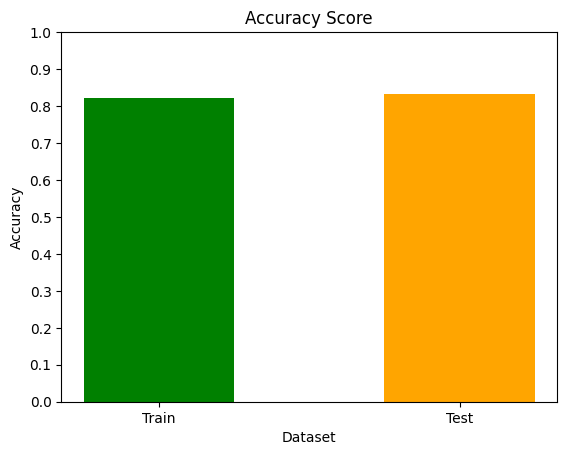

In [24]:
# evaluate the model


nb_train_pred = nb_clf.predict(X_train)
nb_y_pred = nb_clf.predict(X_test)

print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,nb_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,nb_train_pred))
print("Classification report: \n",classification_report(y_train,nb_train_pred,digits=4))


print("ACCURACY FROM Test DATASET :")
print("Accuracy score: ",round(accuracy_score(y_test,nb_y_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_test,nb_y_pred))
print("Classification report: \n",classification_report(y_test,nb_y_pred,digits=4))

#plotting graph
train_acc = accuracy_score(y_train, nb_train_pred)
test_acc = accuracy_score(y_test, nb_y_pred)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()

In [25]:
#Random forest




rf_clf = RandomForestClassifier(max_depth=6 ,n_estimators=5, criterion = 'entropy', random_state=0)
rf_clf.fit(X_train,y_train)




RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=5,
                       random_state=0)

ACCURACY FROM TRAINING DATASET :
Accuracy score:  85.64
Confusion matrix: 
 [[2864    7]
 [ 480   41]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8565    0.9976    0.9216      2871
           1     0.8542    0.0787    0.1441       521

    accuracy                         0.8564      3392
   macro avg     0.8553    0.5381    0.5329      3392
weighted avg     0.8561    0.8564    0.8022      3392

 ACCURACY FROM TESTING DATASET :
Accuracy score:  85.37735849056604
Confusion matrix: 
 [[722   3]
 [121   2]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8565    0.9959    0.9209       725
           1     0.4000    0.0163    0.0313       123

    accuracy                         0.8538       848
   macro avg     0.6282    0.5061    0.4761       848
weighted avg     0.7903    0.8538    0.7919       848



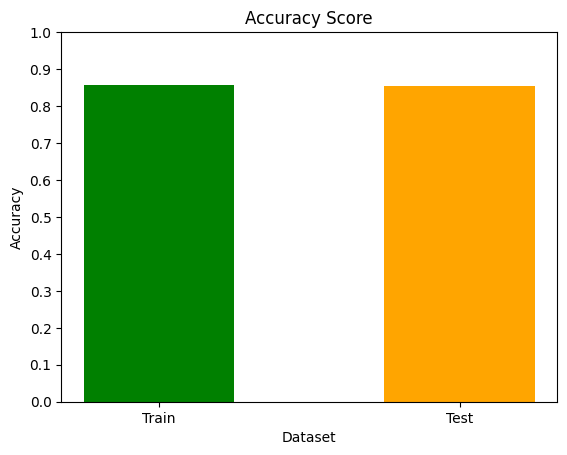

In [26]:
y_rfc_train_pred = rf_clf.predict(X_train)
y_rfc_test_pred = rf_clf.predict(X_test)



print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,y_rfc_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,y_rfc_train_pred))
print("Classification report: \n",classification_report(y_train,y_rfc_train_pred,digits=4))

print(" ACCURACY FROM TESTING DATASET :")
print("Accuracy score: ",accuracy_score(y_test,y_rfc_test_pred)*100)
print("Confusion matrix: \n",confusion_matrix(y_test,y_rfc_test_pred))
print("Classification report: \n",classification_report(y_test,y_rfc_test_pred,digits=4))

#plotting graph
train_acc = accuracy_score(y_train, y_rfc_train_pred)
test_acc = accuracy_score(y_test, y_rfc_test_pred)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()

In [28]:
#ANN

from keras.models import Sequential
from keras.layers import Dense
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

In [29]:
# import libraries
import tensorflow as tf
from tensorflow import keras

In [30]:

# define the model
ann_clf = keras.Sequential([
    keras.layers.Dense(15, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [31]:

# compile the model
ann_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# train the model


hist=ann_clf.fit(X_train,y_train,batch_size = 57, epochs=450,validation_split=0.2)

Epoch 1/450
48/48 [==============================] - 2s 11ms/step - loss: 0.5603 - accuracy: 0.8209 - val_loss: 0.5042 - val_accuracy: 0.8351
Epoch 2/450
48/48 [==============================] - 0s 5ms/step - loss: 0.4808 - accuracy: 0.8441 - val_loss: 0.4450 - val_accuracy: 0.8468
Epoch 3/450
48/48 [==============================] - 0s 4ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.4155 - val_accuracy: 0.8454
Epoch 4/450
48/48 [==============================] - 0s 5ms/step - loss: 0.4187 - accuracy: 0.8433 - val_loss: 0.4015 - val_accuracy: 0.8439
Epoch 5/450
48/48 [==============================] - 0s 4ms/step - loss: 0.4088 - accuracy: 0.8445 - val_loss: 0.3932 - val_accuracy: 0.8468
Epoch 6/450
48/48 [==============================] - 0s 4ms/step - loss: 0.4024 - accuracy: 0.8452 - val_loss: 0.3892 - val_accuracy: 0.8483
Epoch 7/450
48/48 [==============================] - 0s 4ms/step - loss: 0.3980 - accuracy: 0.8452 - val_loss: 0.3858 - val_accuracy: 0.8483
Epoch 8/450


106/106 [==============================] - 0s 2ms/step
TRAINING
Accuracy Score: 0.8679245283018868
Confusion Matrix: [[2800   71]
 [ 377  144]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2871
           1       0.67      0.28      0.39       521

    accuracy                           0.87      3392
   macro avg       0.78      0.63      0.66      3392
weighted avg       0.85      0.87      0.84      3392

TESTING
Accuracy Score: 0.8337264150943396
Confusion Matrix: [[693  32]
 [109  14]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.96      0.91       725
           1       0.30      0.11      0.17       123

    accuracy                           0.83       848
   macro avg       0.58      0.53      0.54       848
weighted avg       0.78      0.83      0.80       848



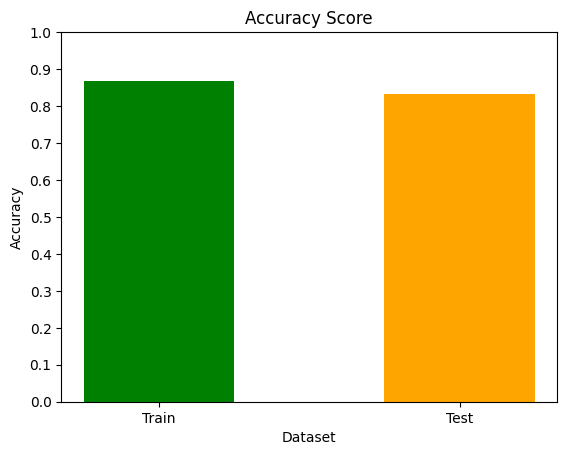

In [33]:
# evaluate the model
y_pred_ann = np.round(ann_clf.predict(X_test))
y_ann_train_pred = np.round(ann_clf.predict(X_train))
print("TRAINING")
print('Accuracy Score:', accuracy_score(y_train, y_ann_train_pred))
print('Confusion Matrix:', confusion_matrix(y_train, y_ann_train_pred))
print('Classification Report:', classification_report(y_train, y_ann_train_pred))
print("TESTING")
print('Accuracy Score:', accuracy_score(y_test, y_pred_ann))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_ann))
print('Classification Report:', classification_report(y_test, y_pred_ann))

#plotting graph
train_acc = accuracy_score(y_train, y_ann_train_pred)
test_acc = accuracy_score(y_test, y_pred_ann)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()


27/27 [==============================] - 0s 2ms/step


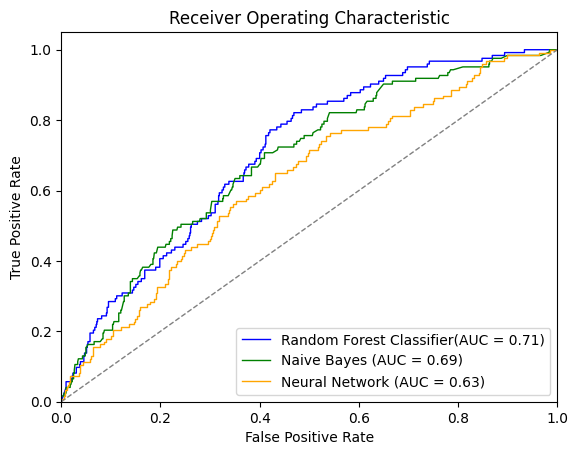

In [34]:
#ROC AUC

from sklearn.metrics import roc_curve, auc

# Predict probabilities for test set for all three models
y_pred_proba_rf = nb_clf.predict_proba(X_test)[:, 1]
y_pred_proba_nb = rf_clf.predict_proba(X_test)[:, 1]
y_pred_proba_nn = ann_clf.predict(X_test)[:, 0]

# Compute ROC curve and ROC area for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_logreg = auc(fpr_rf, tpr_rf)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, color='blue', lw=1, label='Random Forest Classifier(AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_nb, tpr_nb, color='green', lw=1, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_nn, tpr_nn, color='orange', lw=1, label='Neural Network (AUC = %0.2f)' % roc_auc_nn)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [35]:
import gradio as gr  

In [36]:
#gradio with 8 fetaures

def input(male, age, education, currentSmoker, cigsPerDay, BPMeds,
       prevalentStroke, prevalentHyp, diabetes, totChol, sysBP,
       diaBP, BMI, heartRate, glucose):

    new_values = pd.DataFrame({
    'male': [male] ,
    'age': [age],
    'education': [education],
    'currentSmoker': [currentSmoker],
    'cigsPerDay': [cigsPerDay],
    'BPMeds': [BPMeds],
    'prevalentStroke': [prevalentStroke],
    'prevalentHyp': [prevalentHyp],
    'diabetes': [diabetes],
    'totChol': [totChol],
    'sysBP': [sysBP],
    'diaBP': [diaBP],
    'BMI': [BMI],
    'heartRate': [heartRate],
    'glucose': [glucose]

    })
    new_values_scaled = scaler.transform(new_values)
    new_prediction = np.round(ann_clf.predict(new_values_scaled))
    return new_prediction



In [37]:


interface = gr.Interface(fn=input,
                    inputs=["number","number","number","number","number","number","number","number","number","number","number","number","number","number","number"],
                    outputs=['text'],
                    title="Hearte Disease Prediction Using Framingham Heart Disease Dataset"
                    # theme='huggingface',
                    # css = """ ,
                    # body {background-color : grey}
                    # """
                    )


interface.launch(share='True') 

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://284cfc029268510711.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [38]:
import pickle

In [39]:
with open('heart_model.pkl','wb') as files:
    pickle.dump(ann_clf,files)

In [40]:
# import pickle

# save the scaler object to a file
with open('scalerheart.pkl', 'wb') as f:
    pickle.dump(scaler, f)